In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#function to calculate the loss of a model
def get_loss(x, y, theta):
    """x is input data (m x n)
       y is ground truths (m x 1)
       theta is model params (n x 1)"""
    h = x.dot(theta)
    error = np.subtract(h, y)
    sqError = np.square(error)
    sumSqError = np.sum(sqError)
    avgSqError = sumSqError /(2 * len(y)) 
    return avgSqError


In [4]:
#Function to run the gradient descent algorithm
def gradient_descent(x, y, theta, a, iterations):
    """x is input data (m x n)
       y is ground truths (m x 1)
       theta is model params (n x 1)
       a is learn rate (scalar)
       iterations. duh. (scalar)"""
    losses = np.zeros(iterations)
    for i in range(iterations):
        h = x.dot(theta)
        error = np.subtract(h, y)
        delta = x.transpose().dot(error)
        grad = delta / len(y) 
        theta = theta - (a * grad)
        losses[i] = get_loss(x, y, theta)
    return theta, losses


In [5]:
#Read in the CSV into a dataframe
csvData = pd.read_csv("./D3.csv")

csvData.head(5)


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [6]:
#Begin Part A Code


In [7]:
#SETTINGS for Part A
# Learn rate
LEARN_RATE = 0.025
# Gradient descent iterations
ITERATIONS = 1000


In [8]:
#convert the dataframe into formatted np arrays

csvCols = len(csvData.columns)
csvRows = len(csvData)

y = csvData.values[:,csvCols-1].reshape(csvRows, 1)

y[0:5,:]


array([[4.38754501],
       [2.6796499 ],
       [2.96848981],
       [3.25406475],
       [3.53637472]])

In [9]:
#format x1 values
x1 = np.ones((csvRows, 1))
col1 = csvData.values[:,0].reshape(csvRows, 1)
x1 = np.hstack((x1, col1))

x1[0:5,:]


array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [10]:
#format x2 values
x2 = np.ones((csvRows, 1))
col2 = csvData.values[:,1].reshape(csvRows, 1)
x2 = np.hstack((x2, col2))

x2[0:5,:]


array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [11]:
#format x3 values
x3 = np.ones((csvRows, 1))
col3 = csvData.values[:,2].reshape(csvRows, 1)
x3 = np.hstack((x3, col3))

x3[0:5,:]


array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

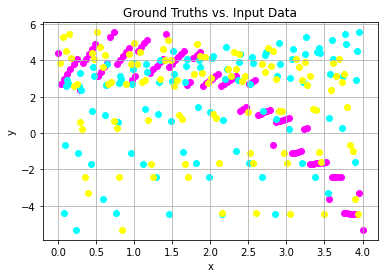

In [12]:
plt.figure(1)
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ground Truths vs. Input Data')
plt.scatter(x1[:,1],y, color='magenta')
plt.scatter(x2[:,1],y, color='cyan')
plt.scatter(x3[:,1],y, color='yellow');


Converged Loss for h(X1): 0.985
Trained Model for h(X1) = -2.030 X1 + 5.905


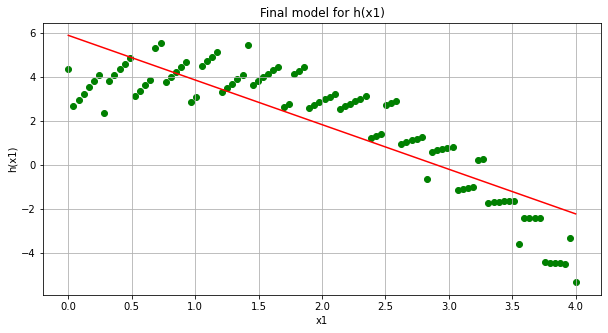

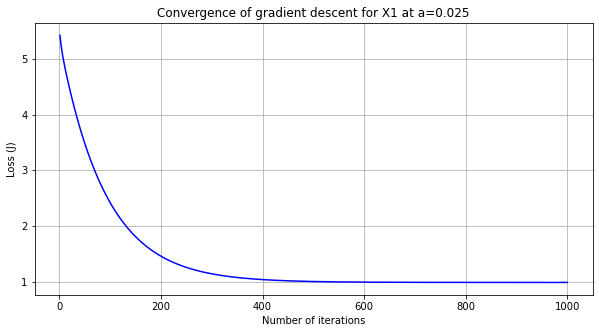

In [13]:
#Run the gradient descent
theta1 = np.zeros((2,1))
theta1, loss1 = gradient_descent(x1,y,theta1,LEARN_RATE,ITERATIONS)

print("Converged Loss for h(X1): {0:.3f}".format(loss1[ITERATIONS-1]))
print("Trained Model for h(X1) = {0:.3f} X1 + {1:.3f}".format(theta1[1,0],theta1[0,0]))

plt.figure(1)
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('x1')
plt.ylabel('h(x1)')
plt.title('Final model for h(x1)')
plt.plot(x1[:,1],x1.dot(theta1), color='red')
plt.scatter(x1[:,1],y, color='green')

plt.figure(2)
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent for X1 at a={}'.format(LEARN_RATE))
plt.plot(range(1, ITERATIONS + 1),loss1, color='blue');


Converged Loss for h(X2): 3.599
Trained Model for h(X2) = 0.558 X2 + 0.734


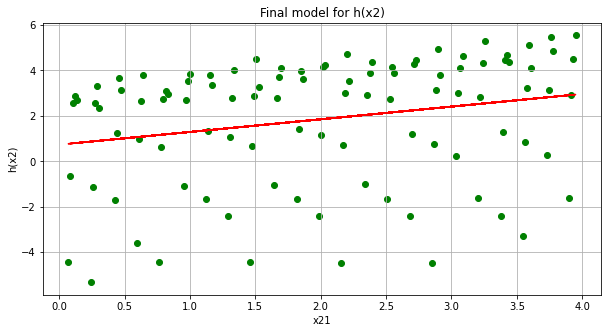

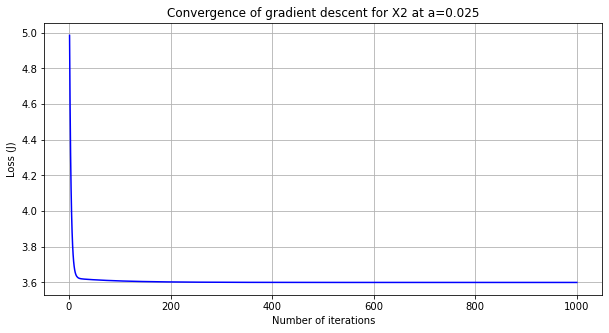

In [14]:
#Run the gradient descent
theta2 = np.zeros((2,1))
theta2, loss2 = gradient_descent(x2,y,theta2,LEARN_RATE,ITERATIONS)

print("Converged Loss for h(X2): {0:.3f}".format(loss2[ITERATIONS-1]))
print("Trained Model for h(X2) = {0:.3f} X2 + {1:.3f}".format(theta2[1,0],theta2[0,0]))

plt.figure(1)
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('x21')
plt.ylabel('h(x2)')
plt.title('Final model for h(x2)')
plt.plot(x2[:,1],x2.dot(theta2), color='red')
plt.scatter(x2[:,1],y, color='green')

plt.figure(2)
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent for X2 at a={}'.format(LEARN_RATE))
plt.plot(range(1, ITERATIONS + 1),loss2, color='blue');


Converged Loss for X3: 3.629
Trained Model for h(X3) = -0.517 X3 + 2.862


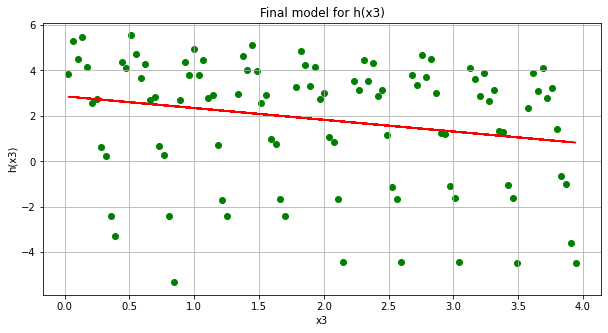

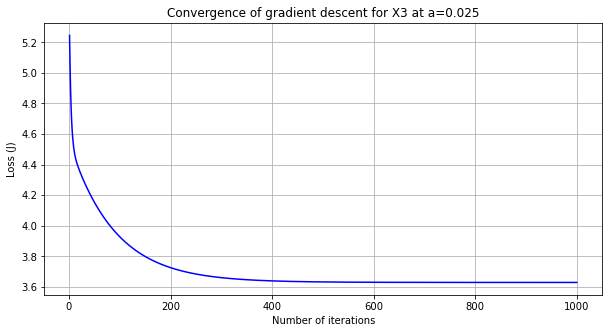

In [15]:
#Run the gradient descent
theta3 = np.zeros((2,1))
theta3, loss3 = gradient_descent(x3,y,theta3,LEARN_RATE,ITERATIONS)

print("Converged Loss for X3: {0:.3f}".format(loss3[ITERATIONS-1]))
print("Trained Model for h(X3) = {0:.3f} X3 + {1:.3f}".format(theta3[1,0],theta3[0,0])) 

plt.figure(1)
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('x3')
plt.ylabel('h(x3)')
plt.title('Final model for h(x3)')
plt.plot(x3[:,1],x3.dot(theta3), color='red')
plt.scatter(x3[:,1],y, color='green')

plt.figure(2)
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent for X3 at a={}'.format(LEARN_RATE))
plt.plot(range(1, ITERATIONS + 1),loss3, color='blue');


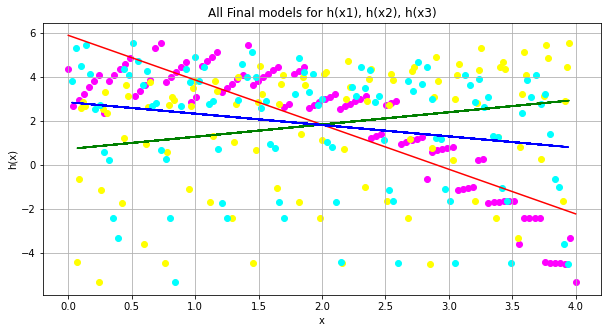

In [16]:
plt.figure(1)
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('All Final models for h(x1), h(x2), h(x3)')
plt.plot(x1[:,1],x1.dot(theta1), color='red')
plt.scatter(x1[:,1],y, color='magenta')
plt.plot(x2[:,1],x2.dot(theta2), color='green')
plt.scatter(x2[:,1],y, color='yellow')
plt.plot(x3[:,1],x3.dot(theta3), color='blue')
plt.scatter(x3[:,1],y, color='cyan');


In [17]:
#End Part A Code,
#Begin Part B code


In [18]:
#SETTINGS for Part B
# Learn rate
LEARN_RATE = 0.055
# Gradient descent iterations
ITERATIONS = 1000


In [23]:
#convert the dataframe into formatted np arrays

#initialize some variables
csvCols = len(csvData.columns)
csvRows = len(csvData)

x = np.ones((csvRows, 1))
y = csvData.values[:,csvCols-1].reshape(csvRows, 1)
for i in range(0,csvCols-1): #populate x
    col = csvData.values[:,i].reshape(csvRows, 1)
    x = np.hstack((x, col))

print("first two X")
print(x[0:2,:])
print("first two Y")
print(y[0:2,:])


first two X
[[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]]
first two Y
[[4.38754501]
 [2.6796499 ]]


Converged Loss J = 0.738
Trained Model h(X1,X2,X3) = -2.001 X1 + 0.536 X2 + -0.262 X3 + 5.293


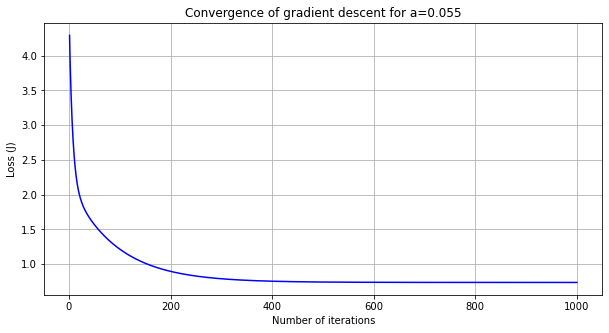

In [20]:
#Run the gradient descent
theta = np.zeros((csvCols,1))
theta, loss = gradient_descent(x,y,theta,LEARN_RATE,ITERATIONS)
print("Converged Loss J = {:.3f}".format(loss[ITERATIONS-1]))
print("Trained Model h(X1,X2,X3) = {0:.3f} X1 + {1:.3f} X2 + {2:.3f} X3 + {3:.3f}"
      .format(float(theta[1]),float(theta[2]),float(theta[3]),float(theta[0])))

plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent for a={}'.format(LEARN_RATE))
plt.plot(range(1, ITERATIONS + 1),loss, color='blue')


In [21]:
XV = np.array([[1, 1, 1],[2, 0, 4],[3, 2, 1]])
XV = np.hstack((np.ones((3, 1)), XV))
print("XV")
print(XV)
H = XV.dot(theta)
print("h(XV)")
print(H)


XV
[[1. 1. 1. 1.]
 [1. 2. 0. 4.]
 [1. 3. 2. 1.]]
h(XV)
[[3.56577916]
 [0.24153226]
 [0.10042608]]
